In [1]:
# In this expample we will apply the Multivariate gaussian distribution:
# 1/(2*π)**0.5n/det(Σ)**0.5 * exp(-0.5*(X-μ).T*inv(Σ)*(X-μ))
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

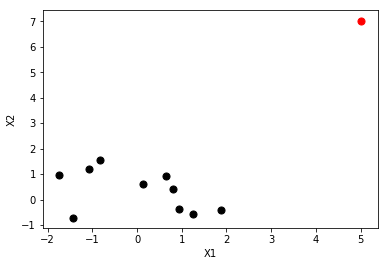

In [2]:
X_train = np.random.randn(10,2) # two features and 10 data
X_anomaly = [5,7]
plt.scatter(X_train[:,0], X_train[:,1], c = 'black', s = 50)
plt.scatter(X_anomaly[0], X_anomaly[1], c = 'r', s = 50)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
n = np.size(X_train,1)
m = np.size(X_train,0)
μ = np.matrix(np.zeros(n))
# calculate the mean matrix μ and shift X_train
for i in range(n):
    μ[0,i] = X_train[:,i].mean()
    X_train[:,i] -= μ[0,i]

# calculate the Convariance matrix Σ:
X_train = np.matrix(X_train)
Σ = np.matrix(np.zeros((n,n)))
for j in range(m):
    Xi = X_train[j,:]
    Σ += 1/m*Xi.T*Xi
Σ_det = np.linalg.det(Σ)
Σ_inv = np.linalg.inv(Σ) 

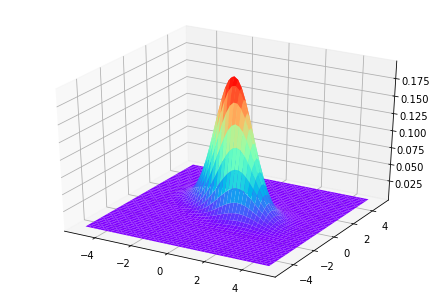

In [4]:
# plot the probability in 3D surface
X1_pre, X2_pre = np.meshgrid(np.linspace(-5,5,50),np.linspace(-5,5,50))
X_pre = np.matrix(np.c_[X1_pre.ravel(), X2_pre.ravel()])

# def the prediction fun
def predict(X): # X should be a matrix
    return 1/((2*np.pi)**(0.5*n))/(Σ_det**0.5)*np.exp(-0.5*(X-μ)*Σ_inv*(X-μ).T)

# predict all points
prob = []
for l in range(len(X_pre)):
    prob += [predict(X_pre[l,:])]
prob = np.array(prob)

fig = plt.figure(1)
ax = Axes3D(fig)
ax.plot_surface(X1_pre, X2_pre, prob.reshape(50,50), rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))
plt.show()

In [5]:
predict(np.matrix([5,7])) # which has very low probability and an anomaly is detected

matrix([[6.75873214e-36]])